In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold


In [11]:
def k_fold_cross_validation(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train model
        model.fit(X_train, y_train)
        
        # Evaluate on test set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Append metrics
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Aggregate metrics
    results = {
        "Accuracy": np.mean(accuracy_list),
        "Precision": np.mean(precision_list),
        "Recall": np.mean(recall_list),
        "F1 Score": np.mean(f1_list)
    }
    
    return results

In [12]:
class WeightedKNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def calculateDistance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def calculateNeighbors(self, x):
        distances = [self.calculateDistance(x, x_train) for x_train in self.X_train]
        neighbors = np.argsort(distances)[:self.k]
        return neighbors, np.array(distances)[neighbors]
    
    def weightedVote(self, neighbors, distances):
        weights = 1 / (distances + 1e-5)
        class_votes = {}
        
        for i, neighbor in enumerate(neighbors):
            label = self.y_train[neighbor]
            class_votes[label] = class_votes.get(label, 0) + weights[i]
        
        return max(class_votes, key=class_votes.get)
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for x in X:
            neighbors, distances = self.calculateNeighbors(x)
            prediction = self.weightedVote(neighbors, distances)
            predictions.append(prediction)
        
        return np.array(predictions)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        
        # Calculate metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y, y_pred)
        
        # Print results
        print("Confusion Matrix:\n", conf_matrix)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        return accuracy

    def returnScore(self, X, y):
        y_pred = self.predict(X)
        
        # Calculate metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y, y_pred)
        
        return accuracy, precision, recall, f1, conf_matrix


In [13]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        # Get the unique classes
        self.classes = np.unique(y)
        
        # Calculate mean, variance, and prior probability for each class
        self.means = {}
        self.variances = {}
        self.priors = {}
        
        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.variances[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]
    
    def calculateLikelihood(self, x, mean, var):
        # Calculate Gaussian likelihood
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent
    
    def calculateClassPosterior(self, x):
        posteriors = {}
        
        for cls in self.classes:
            # Start with the prior
            prior = np.log(self.priors[cls])
            # Sum the log of the likelihoods for each feature
            class_conditional = np.sum(np.log(self.calculateLikelihood(x, self.means[cls], self.variances[cls])))
            posteriors[cls] = prior + class_conditional
            
        return max(posteriors, key=posteriors.get)
    
    def predict(self, X):

        X = np.array(X)
        predictions = [self.calculateClassPosterior(x) for x in X]
        return np.array(predictions)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        
        # Calculate metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y, y_pred)
        
        # Print results
        print("Confusion Matrix:\n", conf_matrix)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        return accuracy
    
    def returnScore(self, X, y):
        y_pred = self.predict(X)
        
        # Calculate metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y, y_pred)
        
        return accuracy, precision, recall, f1, conf_matrix


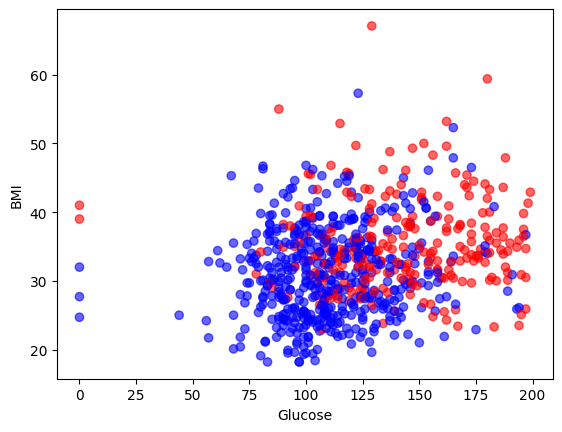

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
diabetes = pd.read_csv('diabetes.csv', header=0)

# Drop rows with 0 values for BMI and BloodPressure
diabetes = diabetes[diabetes['BMI'] != 0]
diabetes = diabetes[diabetes['BloodPressure'] != 0]


# Scatter plot of diabetes data blue for 0 and red for 1
plt.scatter(diabetes['Glucose'], diabetes['BMI'], c=diabetes['Outcome'], cmap='bwr', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


# Separate features and labels
labels = diabetes['Outcome']
features = diabetes.drop('Outcome', axis=1)

print(features.dtypes)



X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.45, random_state=42)

features.head()

c:\Users\matth\Desktop\MachineLearningPredAnalysisLabs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


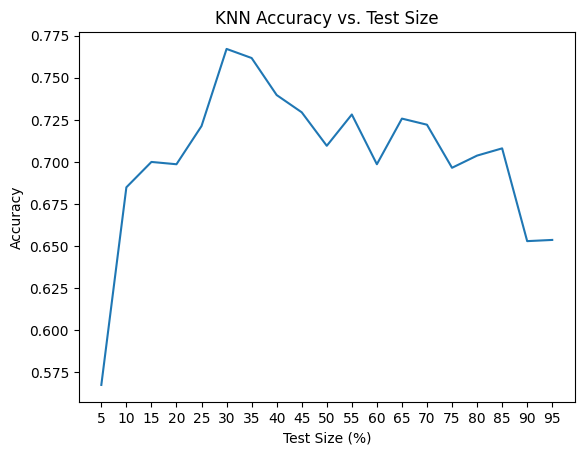

[0.5675675675675675, 0.684931506849315, 0.7, 0.6986301369863014, 0.7213114754098361, 0.7671232876712328, 0.76171875, 0.7397260273972602, 0.729483282674772, 0.7095890410958904, 0.7281795511221946, 0.6986301369863014, 0.7257383966244726, 0.7221135029354208, 0.696526508226691, 0.7037671232876712, 0.7080645161290322, 0.6529680365296804, 0.6536796536796536]


In [21]:
x = []
y = []
for i in range(5, 100, 5):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i/100, random_state=42)
    KNN = WeightedKNN(k=31)
    KNN.fit(X_train, y_train)
    x.append(i)
    y.append(KNN.returnScore(X_test, y_test)[0])
    
plt.plot(x, y)
plt.title("KNN Accuracy vs. Test Size")
plt.xticks(range(5, 100, 5))
plt.xlabel("Test Size (%)")
plt.ylabel("Accuracy")

output_path = "KNNAccuracyLineChart.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


print(y)

In [22]:
# Create Line chart for KNN for all splits of training and testing data in increaments of 5%
with(open("KNNLineCharts/KNNValues.txt", "w")) as f:
    f.write("KNN Line accuracy scores\n")

    for n in range(1, 101, 1):
        x = []
        y = []
        for i in range(5, 100, 5):
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i/100, random_state=42)
            KNN = WeightedKNN(k=n)
            KNN.fit(X_train, y_train)
            x.append(i)
            y.append(KNN.returnScore(X_test, y_test)[0])
        f.write(f"KNN k={n}: " + str(y) + "\n")
        
    f.close()


c:\Users\matth\Desktop\MachineLearningPredAnalysisLabs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matth\Desktop\MachineLearningPredAnalysisLabs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\matth\Desktop\MachineLearningPredAnalysisLabs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

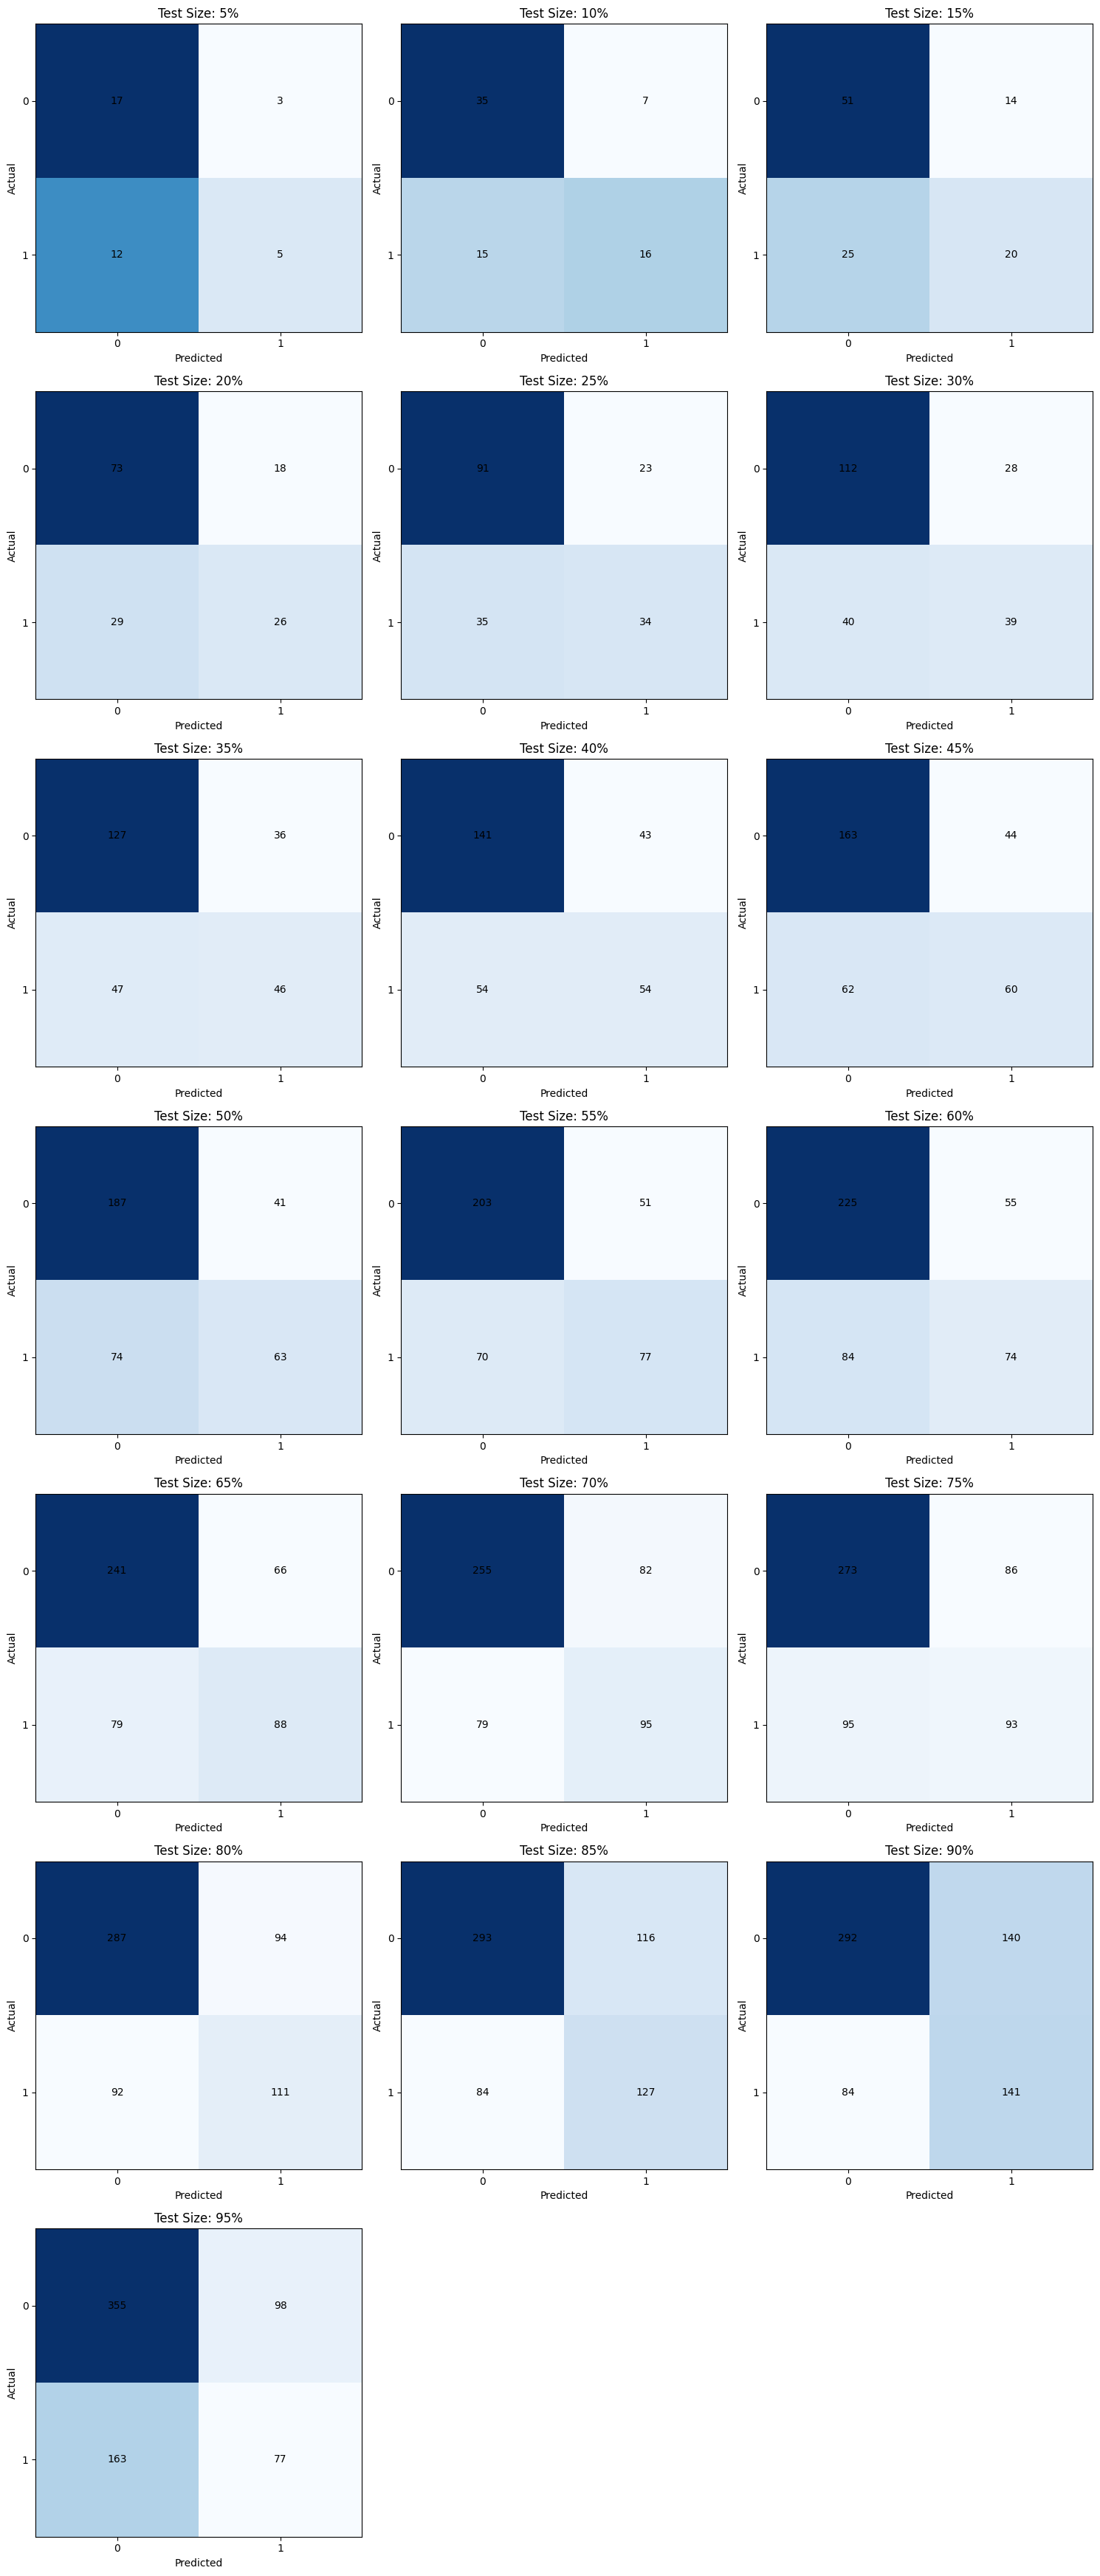

In [17]:
x = []
y = []
confusion_matrices = []

for i in range(5, 100, 5):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i/100, random_state=42)
    KNN = WeightedKNN(k=3)
    KNN.fit(X_train, y_train)
    
    accuracy, precision, recall, f1, conf_matrix = KNN.returnScore(X_test, y_test)
    
    # Store results
    x.append(i)
    y.append(accuracy)
    confusion_matrices.append(np.array(conf_matrix))

# Set up the grid layout
n_rows = (len(confusion_matrices) + 2) // 3 
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plot confusion matrices
for idx, cm in enumerate(confusion_matrices):
    ax = axes[idx]
    ax.imshow(cm, cmap="Blues", aspect="auto")
    ax.set_title(f"Test Size: {x[idx]}%")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    for (j, k), value in np.ndenumerate(cm):
        ax.text(k, j, f"{value}", ha="center", va="center", color="black")

for idx in range(len(confusion_matrices), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

output_path = "KNNconfusionMatricesGrid.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


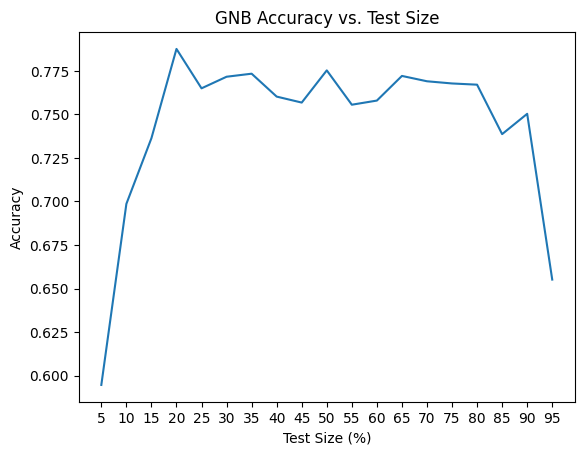

In [18]:

x = []
y = []

for i in range(5, 100, 5):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i/100, random_state=42)
    GNB = GaussianNaiveBayes()
    GNB.fit(X_train, y_train)

    x.append(i)
    y.append(GNB.returnScore(X_test, y_test)[0])
    
plt.plot(x, y)
plt.title("GNB Accuracy vs. Test Size")
plt.xticks(range(5, 100, 5))
plt.xlabel("Test Size (%)")
plt.ylabel("Accuracy")

output_path = "GNBAccuracyLineChart.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


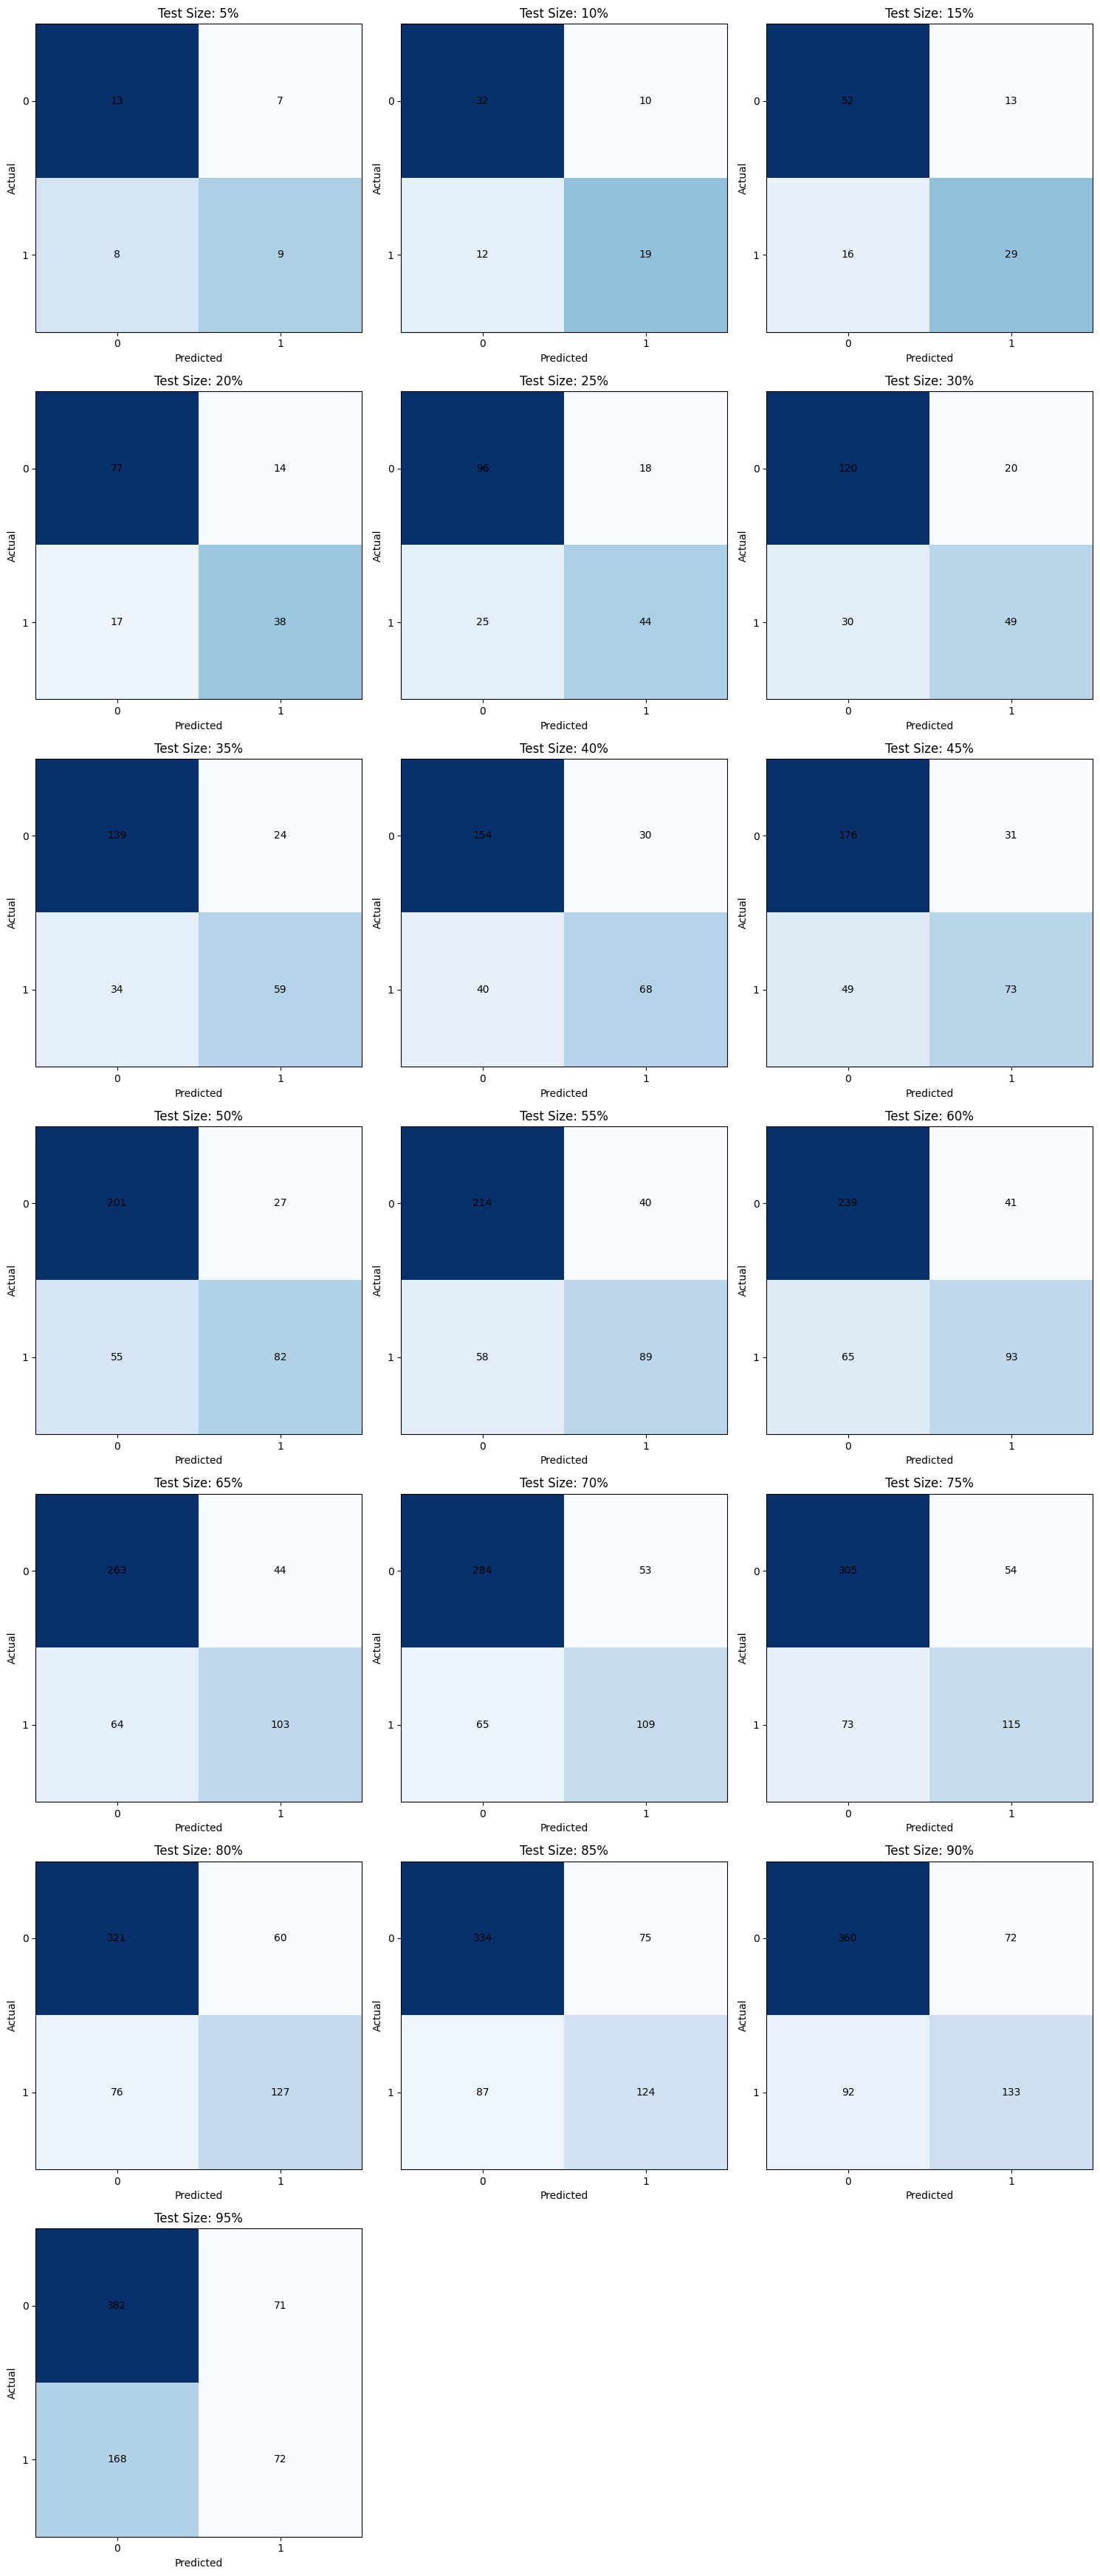

In [19]:
x = []
y = []
confusion_matrices = []

for i in range(5, 100, 5):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i/100, random_state=42)
    GNB = GaussianNaiveBayes()
    GNB.fit(X_train, y_train)
    
    accuracy, precision, recall, f1, conf_matrix = GNB.returnScore(X_test, y_test)
    
    x.append(i)
    y.append(accuracy)
    confusion_matrices.append(np.array(conf_matrix))

n_rows = (len(confusion_matrices) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
axes = axes.flatten()

for idx, cm in enumerate(confusion_matrices):
    ax = axes[idx]
    ax.imshow(cm, cmap="Blues", aspect="auto")
    ax.set_title(f"Test Size: {x[idx]}%")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    for (j, k), value in np.ndenumerate(cm):
        ax.text(k, j, f"{value}", ha="center", va="center", color="black")

for idx in range(len(confusion_matrices), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()

output_path = "GNBconfusionMatricesGrid.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


In [20]:

knn = WeightedKNN(k=3)

results = k_fold_cross_validation(knn, np.array(features), np.array(labels), k=5)

for metric, value in results.items():
    print(f"{metric}: {value:.4f}")


gnb = GaussianNaiveBayes()

results = k_fold_cross_validation(gnb, np.array(features), np.array(labels), k=5)

for metric, value in results.items():
    print(f"{metric}: {value:.4f}")




Accuracy: 0.6790
Precision: 0.6791
Recall: 0.6790
F1 Score: 0.6778
Accuracy: 0.7517
Precision: 0.7485
Recall: 0.7517
F1 Score: 0.7492
